## Análisis del Problema

## Autores
   * Daniel Vargas

## Librerías

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

from sklearn.linear_model import LinearRegression

## Entendimiento de los Datos

In [2]:
!wget https://raw.githubusercontent.com/LDVargas/IA_Datasets/master/all_stocks_5yr.csv

--2021-10-03 20:34:31--  https://raw.githubusercontent.com/LDVargas/IA_Datasets/master/all_stocks_5yr.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29580549 (28M) [text/plain]
Saving to: ‘all_stocks_5yr.csv’

all_stocks_5yr.csv  100%[===================>]  28.21M   131MB/s    in 0.2s    

2021-10-03 20:34:32 (131 MB/s) - ‘all_stocks_5yr.csv’ saved [29580549/29580549]



In [3]:
data = pd.read_csv('/content/all_stocks_5yr.csv')

In [4]:
data["date"]=pd.to_datetime(data["date"])

In [5]:
#shape
data.shape

(619040, 7)

In [6]:
#head of data

data.head()

date   open   high    low  close    volume Name
0 2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1 2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2 2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3 2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4 2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL

In [7]:
#tail of data

data.tail()

date   open   high    low  close   volume Name
619035 2018-02-01  76.84  78.27  76.69  77.82  2982259  ZTS
619036 2018-02-02  77.53  78.12  76.73  76.78  2595187  ZTS
619037 2018-02-05  76.64  76.92  73.18  73.83  2962031  ZTS
619038 2018-02-06  72.74  74.56  72.13  73.27  4924323  ZTS
619039 2018-02-07  72.70  75.00  72.69  73.86  4534912  ZTS

In [8]:
#now lets check shape
data.shape

#lets verify whether nan is present in columns
'nan' in data.columns
#so its proved that nan is not in columns 

False

In [9]:
# Numero de registros del dataset
print("Cantidad de registros:",len(data))
# Cantidad de columnas del dataset
print("Cantidad de columnas:",len(data.columns))
# Tipos de datos del dataset
print("Tipo de datos:",data.dtypes.unique())
# Tamaño del daset
print("Filas y columnas:",data.shape)

Cantidad de registros: 619040
Cantidad de columnas: 7
Tipo de datos: [dtype('<M8[ns]') dtype('float64') dtype('int64') dtype('O')]
Filas y columnas: (619040, 7)


In [10]:
data.head()

date   open   high    low  close    volume Name
0 2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1 2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2 2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3 2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4 2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


In [12]:
cols = ['open', 'high', 'low', 'volume','Name']
data.drop(cols, axis=1, inplace=True)

In [13]:
data = data.sort_values('date')
data.isnull().sum()

date     0
close    0
dtype: int64

In [14]:
data

date   close
0      2013-02-08   14.75
508224 2013-02-08   81.89
506965 2013-02-08   79.07
85755  2013-02-08  238.16
505706 2013-02-08   89.16
...           ...     ...
147509 2018-02-07   52.97
31474  2018-02-07  106.63
241494 2018-02-07   10.76
42609  2018-02-07  177.47
619039 2018-02-07   73.86

[619040 rows x 2 columns]

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619040 entries, 0 to 619039
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   close   619040 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.2 MB


In [16]:
data = data.groupby(pd.Grouper(freq='W',key='date'))['close'].sum().reset_index()

#g = df1.groupby(pd.Grouper(freq="M"))

#data = data.groupby(pd.Grouper(freq='M', key='Date'))

#data = data.groupby('Date')['Weekly_Sales'].sum().reset_index()

In [17]:
data

date        close
0   2013-02-10   27783.4792
1   2013-02-17  139026.3117
2   2013-02-24  110561.9064
3   2013-03-03  137630.3333
4   2013-03-10  141013.7233
..         ...          ...
257 2018-01-14  279159.2290
258 2018-01-21  226212.8350
259 2018-01-28  288049.0500
260 2018-02-04  285176.8800
261 2018-02-11  162884.5500

[262 rows x 2 columns]

## Exploración de los Datos

In [18]:
data.index = data.date

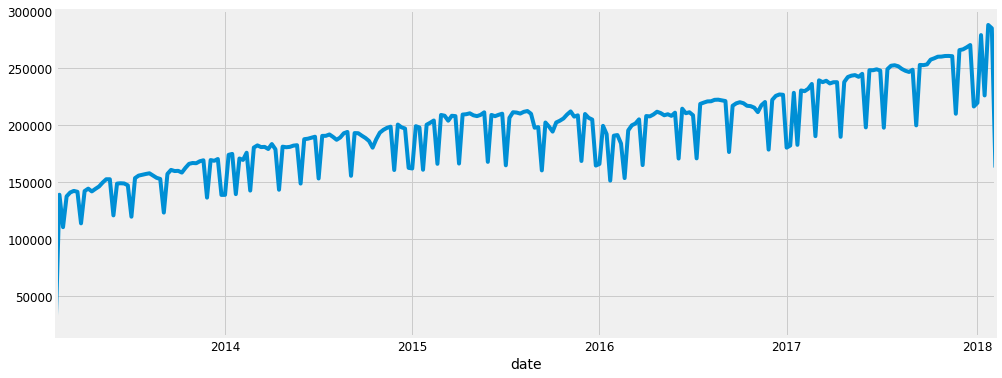

In [19]:
y= data['close']
y.replace('W')
y.mean()
#y = data['Close'].resample('D').mean()
y.plot(figsize=(15, 6))
plt.show()
#y

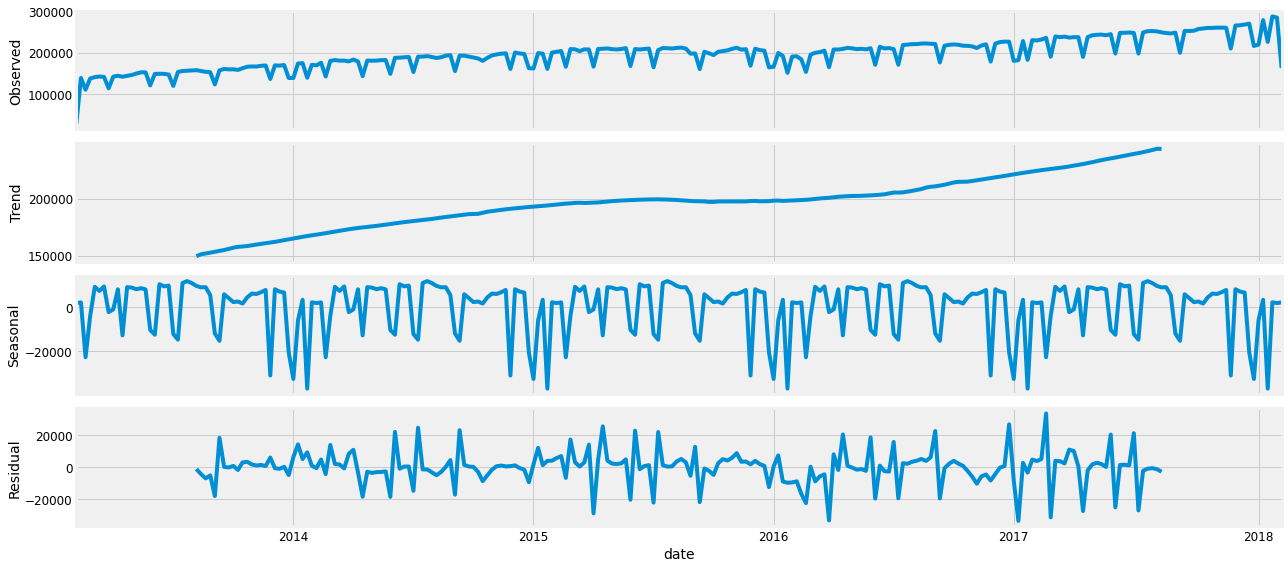

In [20]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
#data["Date"]=pd.to_datetime(data["Date"])
#y = pd.to_numeric(y)
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

## Modelo de Machine Learning

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2],52) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 52)
SARIMAX: (0, 0, 1) x (0, 1, 0, 52)
SARIMAX: (0, 1, 0) x (0, 1, 1, 52)
SARIMAX: (0, 1, 0) x (1, 0, 0, 52)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 52) - AIC:7114.217302269826


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 52) - AIC:5608.513244623565


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 1, 0, 52) - AIC:4911.371900408947


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 1, 1, 52) - AIC:3700.6825932844076


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 0, 52) - AIC:4821.574855000043


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 52) - AIC:4749.2049153934195


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 0, 52) - AIC:3684.7568929550457


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 52) - AIC:3653.6300926314043
ARIMA(0, 0, 1)x(0, 0, 0, 52) - AIC:6908.932774856997


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 52) - AIC:5493.807023601276


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 0, 52) - AIC:4815.348539832809


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 1, 52) - AIC:3618.3414325837384


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 52) - AIC:5521.242199592214


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 52) - AIC:5470.40852455424


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 0, 52) - AIC:3662.0932259834453


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 52) - AIC:3584.3079430116863
ARIMA(0, 1, 0)x(0, 0, 0, 52) - AIC:5990.150070994304


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 52) - AIC:4779.009854675787


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 0, 52) - AIC:4746.153634467907


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 52) - AIC:3593.9283293363023


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 0, 0, 52) - AIC:4761.202589266012


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 52) - AIC:4743.270677180059


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 0, 52) - AIC:3616.6891537326337


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 52) - AIC:3585.674384486055
ARIMA(0, 1, 1)x(0, 0, 0, 52) - AIC:5859.941569464082


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 52) - AIC:4638.530293279596


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 0, 52) - AIC:4639.284595665627


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 52) - AIC:3486.35605796657


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 0, 52) - AIC:4679.975711164295


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 52) - AIC:4623.899068027533


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 52) - AIC:3533.603496264281


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 52) - AIC:3478.553133818682
ARIMA(1, 0, 0)x(0, 0, 0, 52) - AIC:6033.150590253613


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 52) - AIC:4786.169256542995


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 1, 0, 52) - AIC:4751.965156687495


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 52) - AIC:3595.145900334111


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 0, 52) - AIC:4749.521432304495


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 52) - AIC:4772.669441358479


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 0, 52) - AIC:3594.6581378287565


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 52) - AIC:3574.677226494509
ARIMA(1, 0, 1)x(0, 0, 0, 52) - AIC:5888.81495835725


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 52) - AIC:4669.446811774341


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 0, 52) - AIC:4668.473273321801


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 52) - AIC:3509.3575006487417


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 52) - AIC:4706.727641934769


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 52) - AIC:4662.04668513257


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 52) - AIC:3534.217593266628


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 52) - AIC:3503.823422916861
ARIMA(1, 1, 0)x(0, 0, 0, 52) - AIC:5935.055797571656


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 52) - AIC:4715.113140386332


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 0, 52) - AIC:4695.556578358294


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 52) - AIC:3549.4059655807996


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 0, 52) - AIC:4691.721725519322


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 52) - AIC:4693.662142199997


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 0, 52) - AIC:3551.4762329352798


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 52) - AIC:3536.58648051211
ARIMA(1, 1, 1)x(0, 0, 0, 52) - AIC:5861.272164247854


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 52) - AIC:4639.706061391613


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 0, 52) - AIC:4636.619750990225


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 52) - AIC:3484.7666202334235


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 0, 52) - AIC:4654.621051309294


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 52) - AIC:4623.685188407704


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 52) - AIC:3510.600429915403


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 52) - AIC:3478.1725082246166


In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                #order=(1, 1, 1),  #original
                                #seasonal_order=(1, 1, 0, 12), #original
                                order=(1, 1, 1),#
                                seasonal_order=(1, 1, 1, 52),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1572      0.116     -1.355      0.175      -0.385       0.070
ma.L1         -0.8624      0.037    -23.277      0.000      -0.935      -0.790
ar.S.L52       0.6902      0.132      5.235      0.000       0.432       0.949
ma.S.L52      -1.0721      0.087    -12.356      0.000      -1.242      -0.902
sigma2      3.048e+08   2.74e-10   1.11e+18      0.000    3.05e+08    3.05e+08


## Evaluación

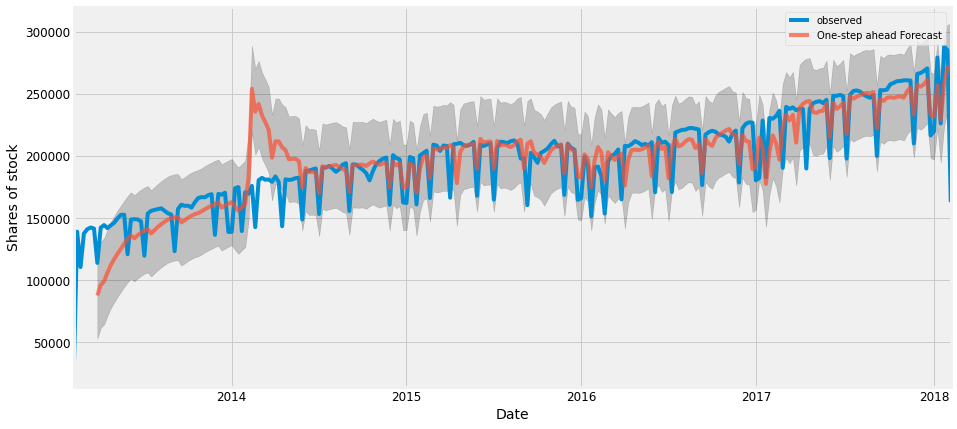

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2013-03-31'), dynamic=False)#2017-05-12
pred_ci = pred.conf_int()
ax = y['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Shares of stock')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2010-12-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 393529506.2


In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 19837.58


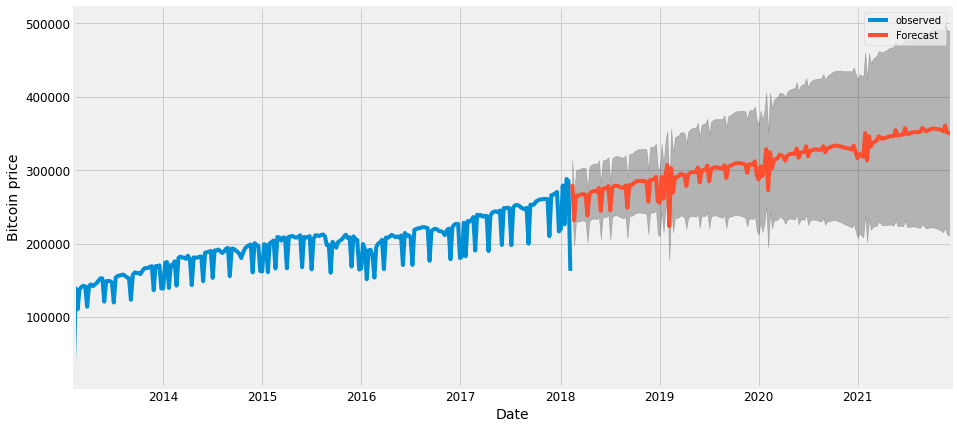

In [ ]:
pred_uc = results.get_forecast(steps=200)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Bitcoin price')
plt.legend()
plt.show()

In [ ]:
pred_ci

lower close    upper close
2018-02-18  246392.770240  315551.974187
2018-02-25  197163.769337  266292.937274
2018-03-04  230607.217412  300528.667558
2018-03-11  229808.705049  300269.791164
2018-03-18  230713.380162  301740.086630
...                   ...            ...
2021-11-14  215337.638073  490875.209644
2021-11-21  222418.036417  499131.732739
2021-11-28  212409.063236  490299.331572
2021-12-05  211290.439254  490359.160865
2021-12-12  209140.503867  489391.365746

[200 rows x 2 columns]

## Resultados

El dataset registraba datos por día, por lo tanto se agruparon por semanas. EL resultado es un modelo que se ajusta muy bien a los datos presentes en el modelo y se pueden hacer predicciones ingresando a cuantas semanas se quiere predecir el precio de las acciones o ingresando una fecha que corresponda a un domingo a partir del 2018-02-11.

In [ ]:
'''import pickle
with open('acciones.sav','wb') as f:
    pickle.dump(pred,f)'''

import pickle
filename = 'acciones'
pickle.dump(results, open(filename, 'wb'))